## Model Training

### 1.1 Import Data and required packages
importing Pandas, numpy, Matplotlib, Seaborn, warning libraries and fastbook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the csv data into pandas dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [60]:
X = df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [61]:
print('categories in "gender" variable:     ', end=" ")
print(df['gender'].unique())

print('categories in "race_ethnicity" variable:     ', end=" ")
print(df['race_ethnicity'].unique())

print('categories in "parental_level_of_education" variable:     ', end=" ")
print(df['parental_level_of_education'].unique())

print('categories in "test_preparation_course" variable:     ', end=" ")
print(df['test_preparation_course'].unique())

print('categories in "lunch" variable:     ', end=" ")
print(df['lunch'].unique())

categories in "gender" variable:      ['female' 'male']
categories in "race_ethnicity" variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
categories in "parental_level_of_education" variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree" 'high school' 'some high school']
categories in "test_preparation_course" variable:      ['none' 'completed']
categories in "lunch" variable:      ['standard' 'free/reduced']


In [62]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [63]:
import fastbook

In [64]:
fastbook.setup_book()
from fastai import *

In [65]:
dep_var = 'math_score'


In [66]:
from fastai.tabular.all import *
procs = [Categorify, FillMissing, Normalize]
df.iloc[:,5].name


'math_score'

## column transform according to sklearn

In [67]:
# create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [68]:
X = preprocessor.fit_transform(X)

In [69]:
X.shape

(1000, 19)

## splitting the data into train and test


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## model evaluator


In [71]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)

    return mae,mse,rmse,r2_square

## Training multiple models


In [75]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "k-neighbor regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    #train the model
    model.fit(X_train,y_train)

    # make the prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate the train and test dataset
    train_mae, train_mse, train_rmse, train_r2_score = evaluate_model(y_train,y_train_pred)

    test_mae, test_mse, test_rmse, test_r2_score = evaluate_model(y_test,y_test_pred)


    #printing the evaluation

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for the training set")
    print("- Root mean squared error : {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2_ score : {:.4f}".format(train_r2_score))

    print('-----------------------------')

    print("Model Performance for validation set")
    print("- Root mean squared error : {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2_ score : {:.4f}".format(test_r2_score))
    r2_list.append(test_r2_score)

    print('='*35)
    print('\n')



Linear Regression
Model performance for the training set
- Root mean squared error : 5.3276
- Mean Absolute Error: 4.2691
- R2_ score : 0.8741
-----------------------------
Model Performance for validation set
- Root mean squared error : 5.4185
- Mean Absolute Error: 4.2234
- R2_ score : 0.8793


Lasso
Model performance for the training set
- Root mean squared error : 6.5938
- Mean Absolute Error: 5.2063
- R2_ score : 0.8071
-----------------------------
Model Performance for validation set
- Root mean squared error : 6.5197
- Mean Absolute Error: 5.1579
- R2_ score : 0.8253


Ridge
Model performance for the training set
- Root mean squared error : 5.3233
- Mean Absolute Error: 4.2650
- R2_ score : 0.8743
-----------------------------
Model Performance for validation set
- Root mean squared error : 5.3904
- Mean Absolute Error: 4.2111
- R2_ score : 0.8806


k-neighbor regressor
Model performance for the training set
- Root mean squared error : 5.7091
- Mean Absolute Error: 4.5175
- R2_

In [76]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879345
7,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.851436
8,AdaBoostRegressor,0.851380
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,k-neighbor regressor,0.783497
4,Decision Tree,0.760847


## Linear Regression
we chose it on the basis of r2 score


In [77]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred) * 100
print("accuracy of the model is %.2f" %score)


accuracy of the model is 87.93


### Plot y-pred and y-test

Text(0, 0.5, 'predicted')

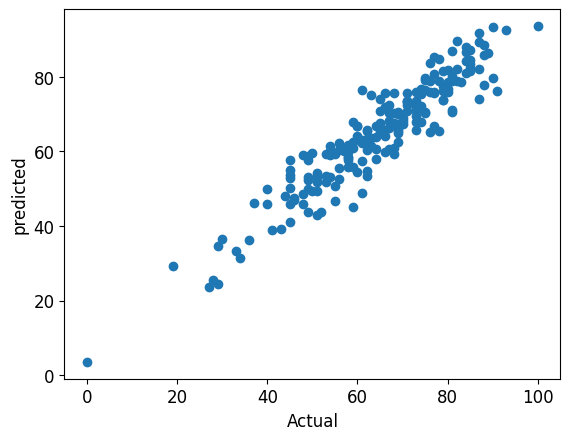

In [78]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

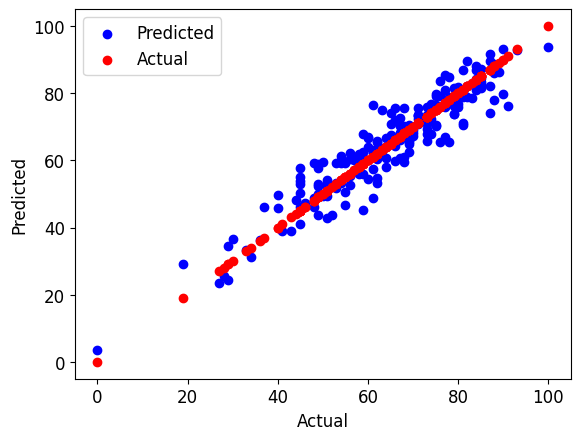

In [79]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Blue for predicted values
plt.scatter(y_test, y_test, color='red', label='Actual')       # Red for actual values

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()  # Show legend to distinguish between actual and predicted points

plt.show()

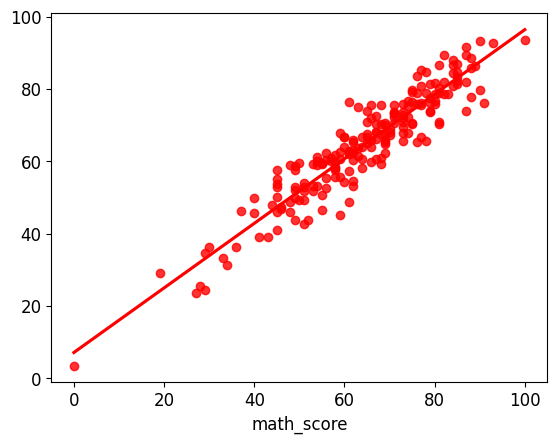

In [81]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red');

## Difference between actual and predicted values

In [82]:
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
